# Steps involved in PCA

Step 1: Center the dataset

Step 2: Calculate the covariance matrix of the centered data

Step 3: Compute the eigenvectors and eigenvalues

Step 4: Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues

Step 5: Transform the original data by multiplying it with the selected eigenvectors (PCs) to obtain a lower-dimensional representation.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
X = np.array([(4,1),(5,4),(6,3),(7,4),(2,-1),(-1,-2),(0,-3),(-1,-4)]).T

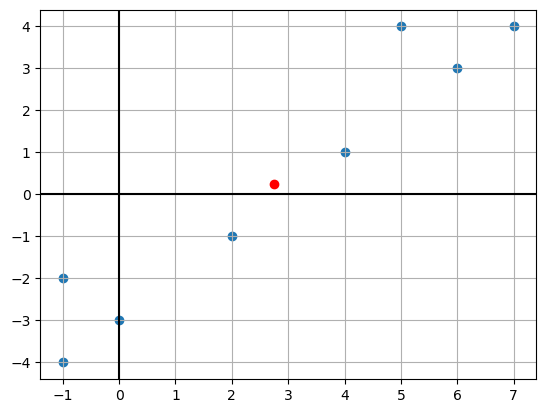

In [6]:
plt.scatter(X[0,:],X[1,:])
plt.axhline(0,color='k')
plt.axvline(0,color='k')

x_mean = X.mean(axis=1)

plt.scatter(x_mean[0],x_mean[1],color='r')
plt.grid()
plt.show()

## Center the dataset

In [8]:
def center(X):
    return X-X.mean(axis=1).reshape(2,1)

d,n = X.shape
X_centered = center(X)

In [10]:
X_centered

array([[ 1.25,  2.25,  3.25,  4.25, -0.75, -3.75, -2.75, -3.75],
       [ 0.75,  3.75,  2.75,  3.75, -1.25, -2.25, -3.25, -4.25]])

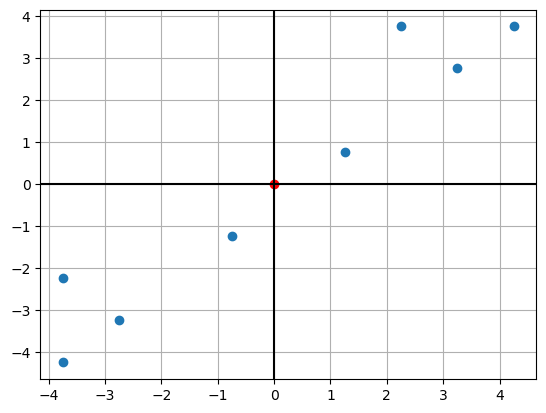

In [12]:
plt.scatter(X_centered[0,:],X_centered[1,:])
plt.axhline(0,color='k')
plt.axvline(0,color='k')

c_mean = X_centered.mean(axis=1)

plt.scatter(c_mean[0],c_mean[1],color='r')
plt.grid()
plt.show()

In [14]:
X_centered.mean(axis=1)

array([0., 0.])

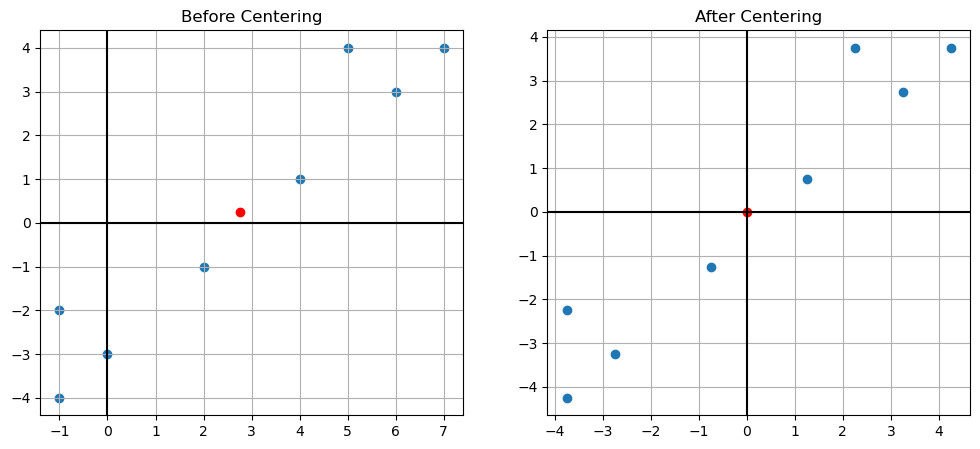

In [16]:
# Comparing two graphs

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.scatter(X[0,:],X[1,:])
plt.axhline(0,color='k')
plt.axvline(0,color='k')

x_mean = X.mean(axis=1)

plt.scatter(x_mean[0],x_mean[1],color='r')
plt.grid()
plt.title("Before Centering")



plt.subplot(1,2,2)
plt.scatter(X_centered[0,:],X_centered[1,:])
plt.axhline(0,color='k')
plt.axvline(0,color='k')

c_mean = X_centered.mean(axis=1)

plt.scatter(c_mean[0],c_mean[1],color='r')
plt.grid()
plt.title("After Centering")

plt.show()

## Finding the Covariance Matrix

The covariance matrix is given by

[
C = \frac{1}{n} \sum_{i=1}^{n} x_i x_i^T = \frac{1}{n} X X^T
]

In [18]:
def covariance(X):
    return X @ X.T / X.shape[1]

C = covariance(X_centered)
d = C.shape[0]
print(C)
# Output:
# [[8.9375 8.5625]
# [8.5625 8.9375]]

[[8.9375 8.5625]
 [8.5625 8.9375]]


## Computing the Principal Components

The 𝑘𝑡ℎ principal component is given by the eigenvector corresponding to the 𝑘𝑡ℎ largest eigenvalue.

In [20]:
def compute_pc(C):
    d = C.shape[0]
    eigval, eigvec = np.linalg.eigh(C)
    w_1, w_2 = eigvec[:, -1], eigvec[:, -2]
    return w_1, w_2

w_1, w_2 = compute_pc(C)

w_1 = w_1.reshape(w_1.shape[0], 1)
w_2 = w_2.reshape(w_2.shape[0], 1)

print(w_1)
print(w_2)

[[0.70710678]
 [0.70710678]]
[[-0.70710678]
 [ 0.70710678]]


## Reconstruction using the two PCs

In [22]:
# Since the points are 2 dimensional, by combining the projection on the two PCs, we get back the centered dataset
w_1 @ (X_centered.T @ w_1).reshape(1,n) + w_2 @ (X_centered.T @ w_2).reshape(1,n)

array([[ 1.25,  2.25,  3.25,  4.25, -0.75, -3.75, -2.75, -3.75],
       [ 0.75,  3.75,  2.75,  3.75, -1.25, -2.25, -3.25, -4.25]])

Let us see the reconstruction error for a point along the first principal component

In [24]:
# The reconstruction error by the first PC is given by
X_1 = np.array((1.25,0.75))
p_1 = X_centered[:,0]

# Let the reconstruction of the first point using first PC is given by
p_2 = w_1 @ (X_1 @ w_1)

The reconstruction error for the entire dataset along the first principal component will be

In [26]:
# Reconstruction error for each point when considering the first principal component
rec_error_1 = np.square(np.linalg.norm(X_centered[:,] - (w_1 @ (X_centered.T @ w_1).reshape(1,n))[:,], axis=0))
print(rec_error_1)

[0.125 1.125 0.125 0.125 0.125 1.125 0.125 0.125]


In [28]:
print("The total reconstruction error along the first component is: " + str(np.round((rec_error_1).mean(),4)))

The total reconstruction error along the first component is: 0.375


In [30]:
w_r = np.array([0,1]).reshape(-1,1)

In [32]:
# Reconstruction error for each point while considering the vector w_r
rec_error_r = np.square(np.linalg.norm(X_centered[:,] - (w_r @ (X_centered.T @ w_r).reshape(1,n))[:,],axis=0))

print(rec_error_r)

[ 1.5625  5.0625 10.5625 18.0625  0.5625 14.0625  7.5625 14.0625]


In [34]:
print("The total reconstruction error along w_r is: " + str(np.round((rec_error_r).mean(),4)))

The total reconstruction error along w_r is: 8.9375


## Finding the optimal value of k

In [36]:
#  Sorting the eigen values in descending order
eigval, eigvec = np.linalg.eigh(C)
eigval = eigval[::-1]

In [38]:
def var_thresh(k):
    total_var = 0
    req_var = 0
    for x in eigval:
        total_var += x
    for y in range(k):
        req_var += eigval[y]

    return req_var/total_var

for i in range(d+1):
    print("The explained variance when k is " + str(i) + " is " + str(np.round(var_thresh(i),4)))

The explained variance when k is 0 is 0.0
The explained variance when k is 1 is 0.979
The explained variance when k is 2 is 1.0
